PROJET : Dashboard d’analyse des ventes (Business Intelligence)

Objectif métier

Aider une entreprise à :

Comprendre l’évolution de ses ventes et bénéfices

Identifier les produits performants et non rentables

Décider où investir et quoi arrêter

1 Données

Données de Kaggle : SuperStore Sales DataSet ( https://www.kaggle.com/datasets/saadharoon27/superstore-dataset)

2 Téléchargement et exploration des données

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df= pd.read_csv("C:/Users/nimat/Desktop/Projets/Projet1/DataSet/SuperStore_Sales_Dataset.csv")
df.head()
#df.info()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


3 Nettoyage et préparation des données
 - Convertir les dates
 - Vérifier les valeurs manquantes
 - Vérifier les doublons

In [28]:
#je garde que les variables qui m'interesse
cols = ['Order ID','Order Date', 'Sales','Profit','Category','Sub-Category',
        'Product Name', 'Region', 'State', 'Country']

df = df[cols]
#Convertir Order Date en Date avec .to_datetime au format JMA 
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

#création d'une colonne Year, Month et Month en lettre
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Month_name'] = pd.to_datetime(df['Order Date']).dt.month_name()
display(df)

,Order ID,Order Date,Sales,Profit,Category,Sub-Category,Product Name,Region,State,Country,Year,Month,Month_name
0,CA-2019-160304,2019-01-01,73.940,28.2668,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",East,Maryland,United States,2019,1,January
1,CA-2019-160304,2019-01-02,173.940,38.2668,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",East,Maryland,United States,2019,1,January
2,CA-2019-160304,2019-01-02,231.980,67.2742,Technology,Phones,GE 30522EE2,East,Maryland,United States,2019,1,January
3,CA-2019-125206,2019-01-03,114.460,28.6150,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,West,California,United States,2019,1,January
4,US-2019-116365,2019-01-03,30.080,-5.2640,Technology,Accessories,Imation Clip USB flash drive - 8 GB,Central,Texas,United States,2019,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,CA-2020-143259,2020-12-30,213.136,12.1176,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",East,New York,United States,2020,12,December
5897,CA-2020-115427,2020-12-30,295.904,4.5188,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",West,California,United States,2020,12,December
5898,CA-2020-156720,2020-12-30,388.024,-0.6048,Office Supplies,Fasteners,Bagged Rubber Bands,West,Colorado,United States,2020,12,December
5899,CA-2020-143259,2020-12-30,462.776,19.7910,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,East,New York,United States,2020,12,December


4 Analyse descriptive

Comprendre les données avant de visualiser.

In [30]:
# Ventes Total et bénéfices Total par catégorie
round(df.groupby('Category')[['Sales','Profit']].sum(), 2)


,Sales,Profit
Category,,
Furniture,451508.65,10006.61
Office Supplies,643707.69,74797.25
Technology,470587.99,90458.25


5 Visualisation

visualiser l'évolution des ventes & bénéfices

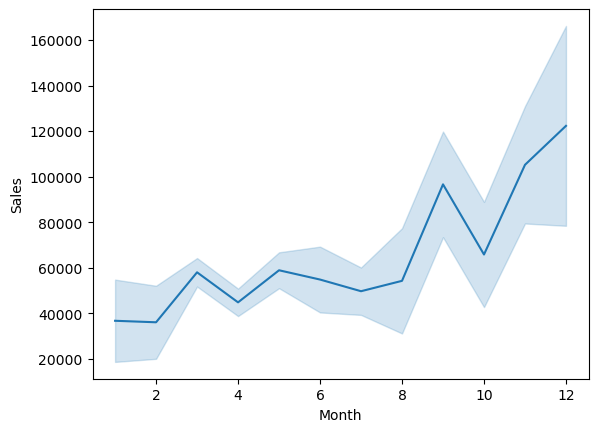

In [ ]:
#courbes des ventes par mois
ventes_mois = df.groupby(['Year','Month'])[['Sales','Profit']].sum().reset_index()
# regroupe 
sns.lineplot(data=ventes_mois, x='Month', y='Sales')
plt.show()